In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import numpy as np
float_formatter = "{:2.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
from collections import Counter
from scipy.stats import f_oneway
import scikit_posthocs as sp
import scipy.stats as ss

In [7]:
df = pd.read_excel("./data/azza_data/AMR.xlsx")

In [8]:
df.describe()

,Degree,approach,scores,Years,Textbooks,Jornal,Internet,Campaigns,General,Developing,USA,UK,Gender,Public,Private,Outpatients,PCC
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.00000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2.991620,0.525140,14.648045,1.256983,0.826816,0.189944,0.349162,0.223464,0.349162,0.343575,0.22905,0.343575,0.497207,0.807263,0.175978,0.145251,0.072626
std,0.971549,0.500067,4.709384,0.530201,0.378936,0.392806,0.477372,0.417150,0.477372,0.475566,0.42081,0.475566,0.500692,0.395001,0.381334,0.352847,0.259884
min,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,26.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
part_1 = df[['scores','Degree']]

In [59]:
splits = []
for i in range(1,5):
    x = part_1.loc[part_1['Degree'] == i]
    x = x[['scores']]
    splits.append(x)

In [60]:
array =[item.values for item in splits]
a, b, c, d = tuple(array)
s, pval = f_oneway(a, b, c, d)
print(s, pval)

[3.04] [0.03]


In [61]:
H, post_hoc_pval = ss.kruskal(a, b, c, d)
print(H, post_hoc_pval)

8.267007088850038 0.04080405152062407


(<matplotlib.axes._subplots.AxesSubplot at 0x869ecce548>,
 <matplotlib.colorbar.ColorbarBase at 0x869ed4e248>)

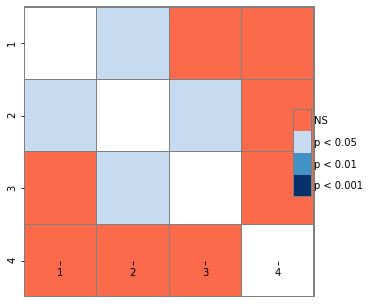

In [73]:
pc = sp.posthoc_conover(part_1, val_col='scores', group_col='Degree')
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)